In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('precision',4)
pd.set_option('display.width',120)

titanic_df = pd.read_csv("./data/titanic_train.csv")

del titanic_df['Name']
#del titanic_df['PassengerId']
del titanic_df['Ticket']
del titanic_df['Cabin']
#titanic_df['Embarked_int'] = pd.Series([titanic_df['Embarked']=='S')


numsex = {"male":1 ,"female" :2}
titanic_df['Sex'] = titanic_df['Sex'].replace(numsex)
titanic_df['Sex'] = titanic_df['Sex'].convert_objects(convert_numeric=True)


numembark = {"S":1 ,"C" :2, "Q":3}
titanic_df['Embarked'] = titanic_df['Embarked'].replace(numembark)
titanic_df['Embarked'] = titanic_df['Embarked'].convert_objects(convert_numeric=True)
titanic_df['Embarked'].fillna(1)

titanic_df['Embarked'].fillna(titanic_df['Age'].mean())

titanic_df.head()

C:\Users\keith\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\keith\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1.0
1,2,1,1,2,38.0,1,0,71.2833,2.0
2,3,1,3,2,26.0,0,0,7.9250,1.0
3,4,1,1,2,35.0,1,0,53.1000,1.0
4,5,0,3,1,35.0,0,0,8.0500,1.0


In [2]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.0000,891.0000,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000,889.0000
mean,446.0000,0.3838,2.3086,1.3524,29.6991,0.5230,0.3816,32.2042,1.3622
std,257.3538,0.4866,0.8361,0.4780,14.5265,1.1027,0.8061,49.6934,0.6362
min,1.0000,0.0000,1.0000,1.0000,0.4200,0.0000,0.0000,0.0000,1.0000
25%,223.5000,0.0000,2.0000,1.0000,20.1250,0.0000,0.0000,7.9104,1.0000
50%,446.0000,0.0000,3.0000,1.0000,28.0000,0.0000,0.0000,14.4542,1.0000
75%,668.5000,1.0000,3.0000,2.0000,38.0000,1.0000,0.0000,31.0000,2.0000
max,891.0000,1.0000,3.0000,2.0000,80.0000,8.0000,6.0000,512.3292,3.0000


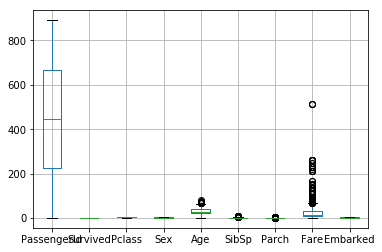

In [3]:
boxplots = titanic_df.boxplot(return_type='axes')

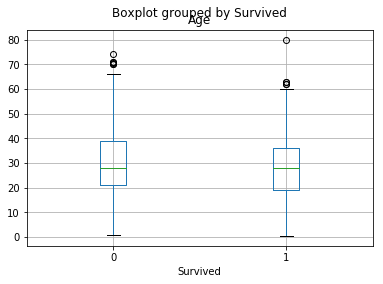

In [4]:
boxplots = titanic_df.boxplot(column='Age',by='Survived',return_type='axes')

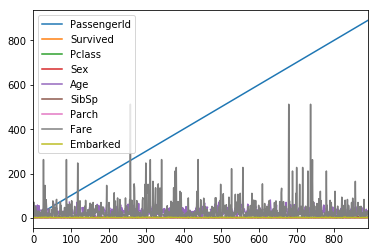

In [5]:
densityplot = titanic_df.plot() #kind='density'

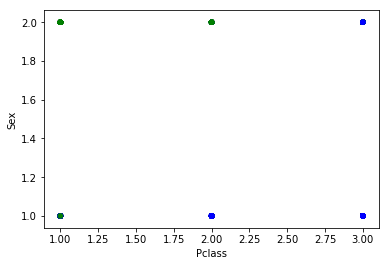

In [6]:
colors_palette = {0:"blue",1: "green"}
groups = list(titanic_df.Survived)
colors = [colors_palette[c] for c in groups]
simple_scatterplot = titanic_df.plot(kind='scatter',x=2,y=3,c=colors)

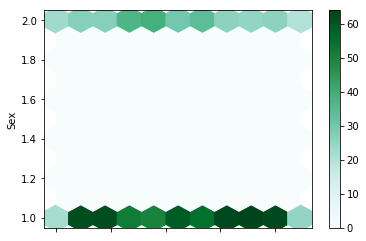

In [7]:
hexbin = titanic_df.plot(kind='hexbin',x=0,y=3,gridsize=10)

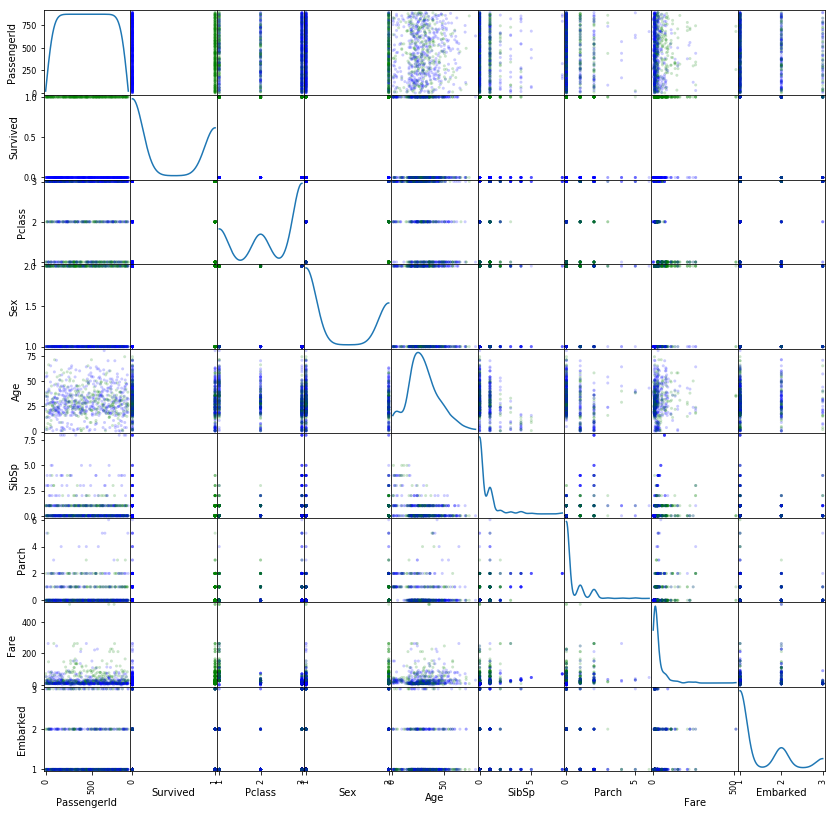

In [11]:
from pandas.plotting import scatter_matrix
colors_palette = {0:"blue",1: "green"}
colors = [colors_palette[c] for c in groups]
matrix_of_scatterplots = scatter_matrix(titanic_df,alpha=0.2,figsize=(14,14),color=colors,diagonal='kde')

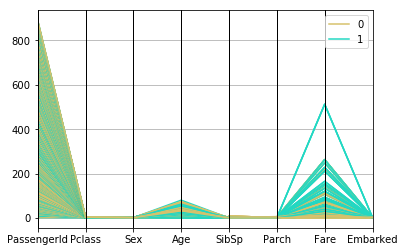

In [12]:
from pandas.plotting import parallel_coordinates
pl1 = parallel_coordinates(titanic_df,'Survived')

In [13]:
missing_perc = titanic_df.apply(lambda x: 100*(1-x.count().sum()/(1.0*len(x))))
sorted_missing_perc = missing_perc.order(ascending=False)
sorted_missing_perc

AttributeError: 'Series' object has no attribute 'order'

In [ ]:
import random
titanic_df = pd.read_csv("./data/titanic_train.csv")

bar_width=0.1
categories_map={'Pclass':{'First':1,'Second':2,'Third':3},
               'Sex':{'Female':'female','Male':'male'},
               "Survived":{'Perished':0,'Survived':1},
               'Embarked':{'Cherbourg':'C','Queenstown':'Q','Southampton':'S'},
               'SibSp':{str(x): x for x in [0,1,2,3,4,5,8]},
               'Parch':{str(x): x for x in range(7)}}
colors = ['red','green','blue','yellow','magenta','orange']
subplots=[111,211,311,411,511,611,711,811]
cIdx=0
fig,ax=plt.subplots(len(subplots),figsize=(10,12))
keyorder=['Survived','Sex','Pclass','Embarked','SibSp','Parch']

for category_key,category_items in sorted(categories_map.items(),key=lambda i:keyorder.index(i[0])): 
    #for 2.7 use categories_map.iteritems()
    num_bars=len(category_items)
    index=np.arange(num_bars)
    idx=0
    for cat_name,cat_val in sorted(category_items.items()):
        ax[cIdx].bar(idx,len(titanic_df[titanic_df[category_key]==cat_val]),label=cat_name,color=np.random.rand(3,1))
        idx+=1
    ax[cIdx].set_title('%s Breakdown'%category_key)
    xlabels=sorted(category_items.keys())
    ax[cIdx].set_xticks(index+bar_width)
    ax[cIdx].set_xticklabels(xlabels)
    ax[cIdx].set_ylabel('Count')
    cIdx +=1
    
for hcat in ['Age','Fare']:
    ax[cIdx].hist(titanic_df[hcat].dropna(),color=np.random.rand(3,1))
    ax[cIdx].set_title('%s Breakdown' %hcat)
    ax[cIdx].set_ylabel('Frequency')
    cIdx+=1
    
fig.subplots_adjust(hspace=0.8)
plt.show()